<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>

<img width="200px" src="https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png">

---
# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p style="font-weight:bold">ADVICE</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p style="font-weight:bold">WARNING</p>

<p>If using <a href="https://try.jupyter.org">try.jupyter.org</a> do not rely on the server for anything you want to last - your server will be <span style="font-weight:bold">deleted after 10 minutes of inactivity</span>. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

In [2]:
fibonacci <- function(n) {
    
    if (length(n) > 1) {
        return(sapply(n, fibonacci))
    } else {
        if (n == 1 | n == 2) {
            return(1)
        } else {
            return(fibonacci(n-1) + fibonacci(n -2))
        }    
    }
}

fibonacci(30)

[1] 832040

#### Q 1.1.2
What's the complexity of your implementation?

We can use a closure to count the number of operations and thus gauge the complexity of the algorithm.

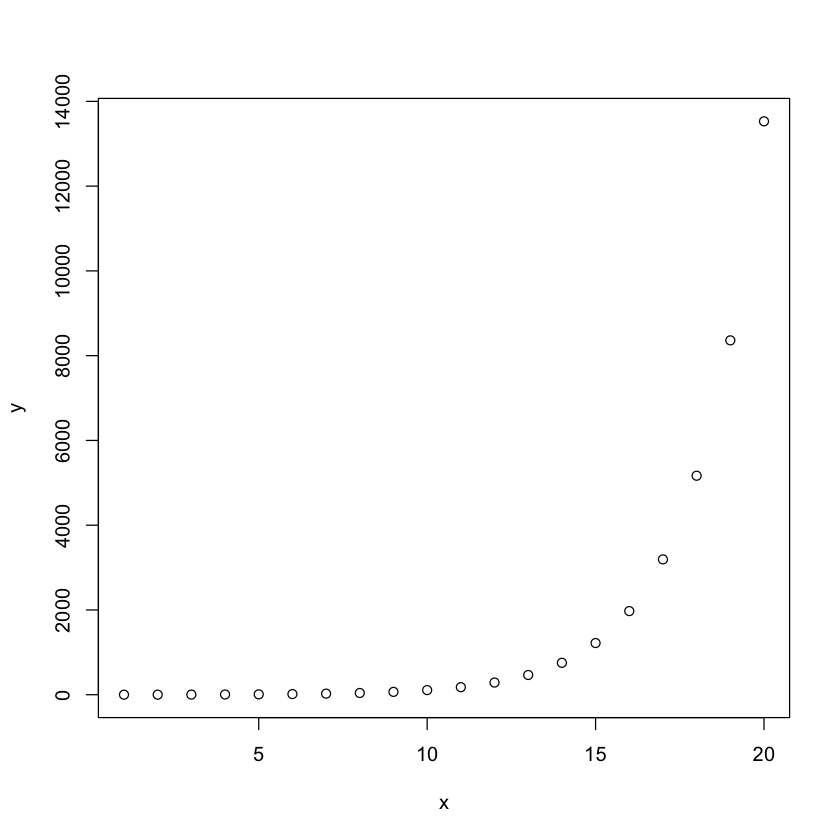

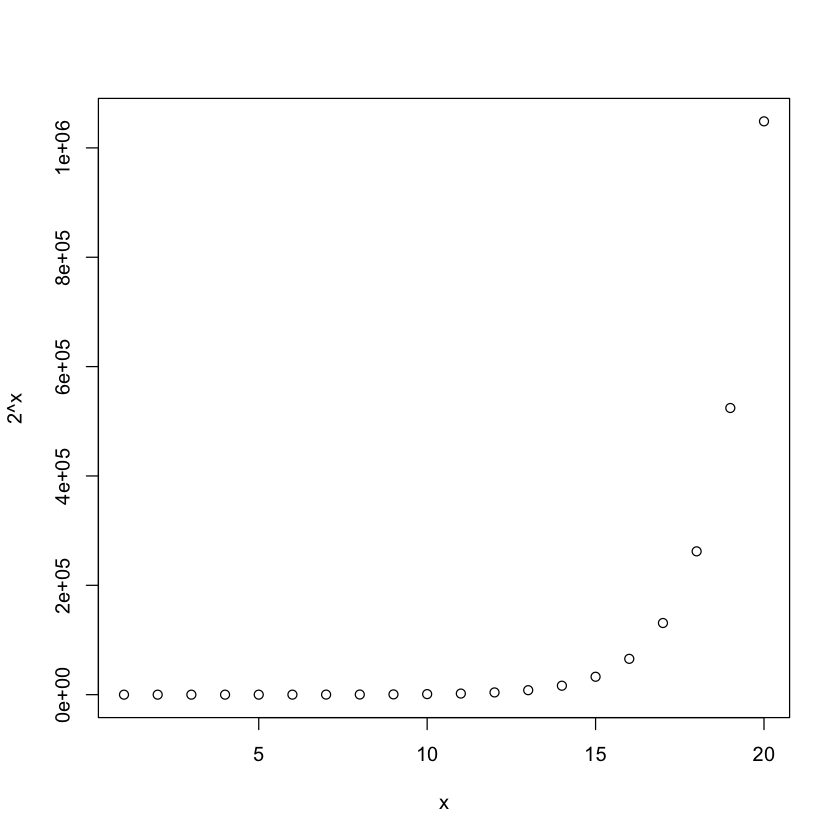

In [19]:
fib_counter <- function(n) {
    counter <- 0
    fibonacci <- function(n) {
        if (length(n) > 1) {
            return(sapply(n, fibonacci))
        } else {
            counter <<- counter + 1
            if (n == 1 | n == 2) {
                return(1)
            } else {
                return(fibonacci(n-1) + fibonacci(n -2))
            }    
        }
    }
    return(list('n' = n, 'fib' = fibonacci(n), 'count' = counter))
}

plot_data <- lapply(1:20, fib_counter)
x <- sapply(plot_data, '[[', 'n')
y <- sapply(plot_data, '[[', 'count')

plot(x, y)

The algorithm is O(2^N) complexity. I'm not completely experienced in determining this, but basically, the number of operations required to be executed increases much faster than the N.

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

In [11]:
fib_iter <- function(n) {
    if (n == 1) {
        return(1)
    } else if (n == 2) {
        return(2)
    } else {
        answer_list <- vector(length=n, mode='list')
        answer_list[[1]] <- 1
        answer_list[[2]] <- 1
        for (i in 3:length(answer_list)) {
            answer_list[[i]] <- answer_list[[i - 1]] + answer_list[[i - 2]]
        }
        return(answer_list[[n]])
    }       
}

#### Q 1.1.4
What's the complexity of your implementation?

The complexity is now O(n) - there are exactly N operations for any input of N.

#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?


There are a couple of different fibonacci implementations: 

The first is memoization. Memoization (caching) would allow a simple lookup of a previous iteration in the sequence. While this still incurs a number of operations, a simple lookup is very fast, and this improves the performance on the first implementation by a lot.

While this is traditionally a recursion problem, you can also use an iterator and simply loop through (my chosen solution).

The "most" efficient way to do this would probably be a combination of the two - for a large program that was doing something like this many times, you could cache the results in memory and look them up for other processes or threads using an iterator/generator.

Further, some languages are more amenable to this than others. While I chose to use R, Python's generator construct would allow iteration over a result but keeping only the final result in memory - compared to the R implementation of holding each value in a list, this is much more memory efficient.

### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


#### Q 1.2.2
What is the complexity of your implementation?

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

#### Q 1.2.4
What's the complexity of this implementation?


#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
![pi pie img](http://core2.staticworld.net/images/article/2016/03/pi-day-intro-100649273-carousel.idge.jpeg)

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

### Q 2.2: Making a 6-side die roll a 7?

![reno die image](http://thumbs.ebaystatic.com/images/g/IQ8AAOSwvzRXyagD/s-l225.jpg)

Using a single 6-side die, how can you generate a random number between 1 - 7?

### Q 2.3: Is normality uniform?

![normal and uniform distributions](https://qph.ec.quoracdn.net/main-qimg-f6ed71ed1d0059760fb63db384dcbcca-c)

Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

In [116]:
PlayLincolnBall <- function(maxRoll=10000) {
    
    roll <- 1
    while(roll < maxRoll) {
        coin <- sample(c('H', 'T'), prob = c(0.5, 0.5), size = 1)
        if (coin == 'H') {
            break
        } else {
            roll <- roll + 1
        }
    }
    payout <- 2^(roll - 1)
    return(payout)
}

payouts <- replicate(n = 3000000, expr = PlayLincolnBall())
payments <- log(payouts, base=2) + 1

I typed up this quick simulation to get a large vector of payouts from which to create an empirical distribution. I then found the expected value and simply added a 10% hike on top in order to better ensure a profit (and allow for error when estimating the expected value).

In [124]:
probs <- table(payouts)/length(payouts)
price <- sum(as.integer(names(probs)) * probs)
profit_price <- 0.1 * price + price

profits <- (profit_price * payments) - payouts

cat(sprintf('Expected Value: %s\n', sum(as.integer(names(probs)) * probs)))
cat(sprintf('Total Profit (3m games): %s\n', sum(profits)))
cat('Quantiles:')
quantile(profits, probs = c(0, 0.25, 0.5, 0.75, 1))

Expected Value: 10.1425863333333
Total Profit (3m games): 36534910.451855
Quantiles:

0%           25%           50%           75%          100% 
-524064.86310      10.15684      10.15684      20.31369      39.78422

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?